# CHEM 101.6 Project1

This is a Jupyter notebook for running and analyzing a Molecular Dynamics (MD) simulations of Butane using the OpenMM engine 

In [1]:
import platform
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import openmm as mm
from openmm import app
from openmm import unit
from openmm import *
from openmm.app import *
from openmm.unit import *
import numpy as np
import matplotlib.pyplot as plt
import scipy
from statistics import mean, stdev
from matplotlib import colors
import mdtraj as md
import seaborn as sns

/var/folders/s0/8tkldvk957j2fw0m74_wyykw0000gn/T/ipykernel_89136/2526760824.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
workdir = '/Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise0'
datadir = '/Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise0/data'
outdir = '/Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise0/outdir'
PDB_file_name = datadir+'/butane.pdb'
forcefield_file_name = datadir+'/butane.gaff2.xml'

### Loading the Traj ###

In [3]:
traj = md.load(os.path.join(f'{outdir}/butane_test.dcd'), top=PDB_file_name)

In [4]:
# Let's look at atoms and bonds in a pretty dataframe :) 
atoms, bonds = traj.topology.to_dataframe()
# Lets grab the topology
top=traj.topology

In [7]:
#Compute Some Distances and plot the time course
bond_indices = [0, 4] # between C1 and C2
C1C2bondlength = md.compute_distances(traj, [bond_indices])
print(f'mean bond length: {C1C2bondlength.mean():.4f}A')
# plt.plot(C1C2bondlength,linewidth=1)
# #plt.plot(C1C2bondlength,linewidth=0,marker='x',markersize=.1)
# plt.xlabel('Frame', size=18)
# plt.xticks(size=18)
# plt.yticks(size=18)

# plt.xlim(0,100)

# plt.ylabel('Bond Length', size=18)
# plt.title('C1-C2 Bond Length')
# plt.show()

# We see oscillation! about the equilibrium bond length 

mean bond length: 0.1539A


In [6]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C2C3bondlength)

# Now, instead of plotting a line, we'll plot dots 
# kind of cool 
# plt.plot(C2C3bondlength,linewidth=0,marker='x',markersize=.1)
# plt.xlabel('Frame', size=18)
# plt.xticks(size=18)
# plt.yticks(size=18)
# plt.ylabel('Bond Length', size=18)
# plt.title('C2-C3 Bond Length')
# plt.show()

In [7]:
bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C3C4bondlength)
# plt.plot(C3C4bondlength,linewidth=0,marker='x',markersize=.1)
# plt.xlabel('Frame', size=18)
# plt.xticks(size=18)
# plt.yticks(size=18)
# plt.ylabel('Bond Length', size=18)
# plt.title('C3-C4 Bond Length')
# plt.show()

In [8]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

# Now! histograms <3
# plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
# plt.hist(C2C3bondlength,label='C2-C3',color='r',histtype='step',bins=50)
# plt.hist(C3C4bondlength,label='C3-C4',color='g',histtype='step',bins=50)

# plt.legend(loc='upper right')
# plt.xlabel('Bond Length (nm) ', size=15)
# plt.xticks(size=15)
# plt.ylabel('Counts', size=15)
# plt.yticks(size=15)
# plt.show()

# Weird difference --> just stats then? 

Lets Write Functions to Calculate the Variance ($\sigma^2$) and Standard Deviation ($\sigma$)

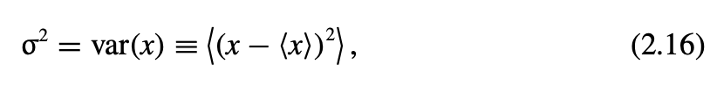

In [27]:
######Class Activtiy: Calculate the Variance and Standard Deviation of Each Bond Length######
# Brother... 

def variance(arr): 
    # first, get avg
    avg =  np.average(arr)
    # then, subtract avg from arr, square it, and then take the average! 
    var = np.average((arr-avg)**2)
    # Where stdev is the square root of the variance 
    stdev = var**0.5
    return var, stdev

In [28]:
###SOLUTION###
# these variable names are giving me a headache
C1C2var, C1C2stdev = variance(C1C2bondlength)
C2C3var, C2C3stdev = variance(C2C3bondlength)
C3C4var, C3C4stdev = variance(C3C4bondlength)

In [34]:
print(f"C1-C2 variance = {C1C2var}")
print(f"C1-C2 stdev = {C1C2stdev}")
print('\n')
print(f"C2-C3 variance = {C2C3var}")
print(f"C2-C3 stdev = {C2C3stdev}")
print('\n')
print(f"C3-C4 variance = {C3C4var}")
print(f"C3-C4stdev = {C3C4stdev}")

C1-C2 variance = 1.8848141962735099e-06
C1-C2 stdev = 0.0013728853543808783


C2-C3 variance = 1.884196649371006e-06
C2-C3 stdev = 0.001372660427553372


C3-C4 variance = 1.8725621657722513e-06
C3-C4stdev = 0.0013684159330306892


In [36]:
# Lets Check Our Answers with the Built In Numpy Libraries
# wow 
print("C1-C2 average:",np.average(C1C2bondlength),"variance:",np.var(C1C2bondlength),"std-dev:",np.std(C1C2bondlength))
print('\n')
print("C2-C3 average:",np.average(C2C3bondlength),"variance:",np.var(C2C3bondlength),"std-dev:",np.std(C2C3bondlength))
print('\n')
print("C3-C4 average:",np.average(C3C4bondlength),"variance:",np.var(C3C4bondlength),"std-dev:",np.std(C3C4bondlength))

C1-C2 average: 0.15390438 variance: 1.8848142e-06 std-dev: 0.0013728853


C2-C3 average: 0.15395467 variance: 1.8841966e-06 std-dev: 0.0013726604


C3-C4 average: 0.15390055 variance: 1.8725622e-06 std-dev: 0.0013684159


### Best fit line & corr coeffs ###

***Class Activity: Lets Check if These Bond Lengths Are Correlated and Calculate the Coerrleation Coefficents***

***First Calculate a Best Fit Line****

We can do this using the np.polyfit function:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

***Now Calculate the Perason Correlation Coefficient***
We can use numpy to calculate the correlation coeffient 

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

This function works for n-arrays, so it will report correlation coefficient matrix, and we need to select our coefficient of interest, which in our case is the off diagnol  


In [9]:
C1C2bondlength.squeeze().shape

(100000,)

/var/folders/s0/8tkldvk957j2fw0m74_wyykw0000gn/T/ipykernel_84874/3071802598.py:10: RankWarning: Polyfit may be poorly conditioned
  line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)
/var/folders/s0/8tkldvk957j2fw0m74_wyykw0000gn/T/ipykernel_84874/3071802598.py:17: RuntimeWarning: invalid value encountered in power
  y2 = line_fit2[0]**x+line_fit2[1]


Line Parameters: [0.50014153 0.07697703]


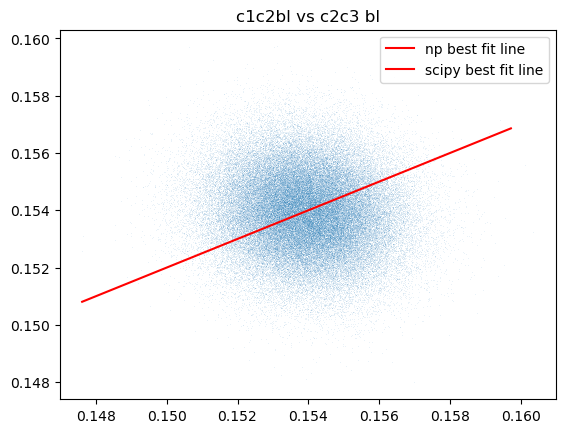

r2: -0.09739824816635793
Line Parameters: [0.49996793 0.07695031]


/var/folders/s0/8tkldvk957j2fw0m74_wyykw0000gn/T/ipykernel_84874/3071802598.py:35: RankWarning: Polyfit may be poorly conditioned
  line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)


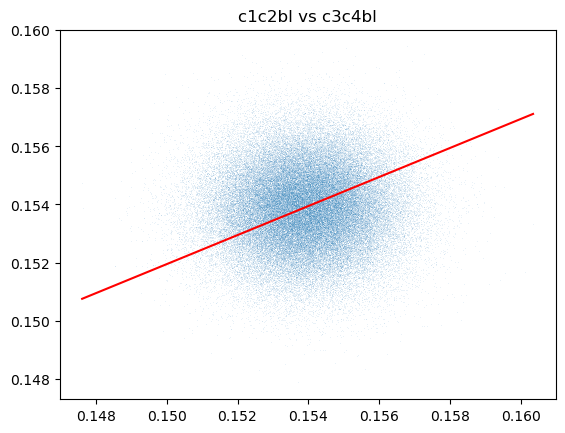

r2: 0.011988354950529046


In [9]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

#######SOLUTION###########

# x: c1c2
# y: c2c3
plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',s=0.1,linewidth=0.05)
# fit to first order polynomial 
line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)
line_fit2 = scipy.stats.linregress(C1C2bondlength[:,0],C2C3bondlength[:,0])

# span to min bond length to max bond length
x = np.linspace(min(C1C2bondlength[:,0]), max(C2C3bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]

y2 = line_fit2[0]**x+line_fit2[1]

print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='np best fit line')
plt.plot(x,y2,c='r',label='scipy best fit line')
plt.title('c1c2bl vs c2c3 bl')
plt.legend()
plt.show()
plt.clf()

# Getting our correlation coefficient
r=np.corrcoef(C1C2bondlength[:,0], C2C3bondlength[:,0])
print("r2:",r[0,1])


# Now, c1c2 vs c3c4
plt.scatter(C1C2bondlength,C3C4bondlength,marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C1C2bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.title('c1c2bl vs c3c4bl')
plt.show()

r=np.corrcoef(C1C2bondlength[:,0], C3C4bondlength[:,0])
print("r2:",r[0,1])

### Homework, due WED 4/10 ###


**WEEK 1 Homework Question:  Why does one pair of these bonds appear slightly more correlated than the other?**

* **My attempted answer:** Well, in butane, there are 3 C-C bonds. We are calculating the correlation the lengths of two bonds that are directly adjacent to one another (the c1c2 vs c2c3), and then the correlation between two bonds that are not connected to eachother (the c1c2 vs c3c4 case). We see that the former has an r^2 of -0.1, while the latter has a r^2 0.01. It makes sense that the former exhibits a slightly strong, albeit negative, correlation, as those two bonds are quite literally next to one another, and therefore should be more correlated than bonds who do not share a direct connection. 

***Class Activity*** 

***Lets write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

Lets Turn these histograms into a probability densities and then fit them to a
normal (Gaussian) Distribution

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

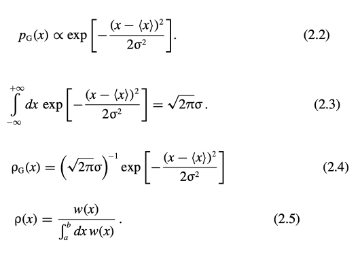
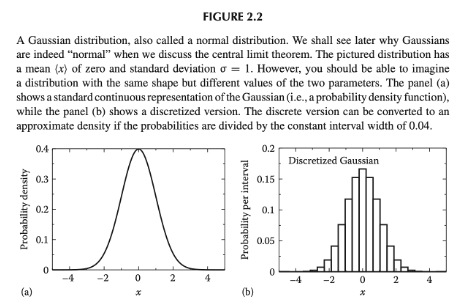

[    2     0    12    69   306  1012  2877  6509 11321 16400 18617 17004
 12887  7540  3583  1336   385   107    27     4] [0.147   0.14765 0.1483  0.14895 0.1496  0.15025 0.1509  0.15155 0.1522
 0.15285 0.1535  0.15415 0.1548  0.15545 0.1561  0.15675 0.1574  0.15805
 0.1587  0.15935 0.16   ]
a: 0.18674549223335146 x_0: 0.1539045505145995 fit_sigma: -0.0013904725219957659


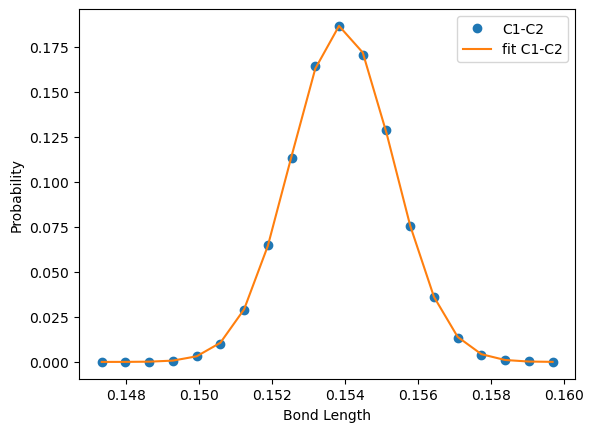

In [8]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit

####SOLUTION####

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bondlength,bins=20,range=[0.147,0.160])
print(counts,edges)
centers = edges[:-1] + np.diff(edges)/2
density=counts/(np.sum(counts))

### THIS IS WHAT YOU WANT TO TURN INTO A FUNCTION FOR HOMEWORK ####

###Now we define a gaussian function that we'll fit to our probability densities
def gauss(x,a, x0, sigma):
    return(a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss,x,y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x_0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(x,fit_a,fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma]


C1C2_fit,C1C2_fit_params=fit_gauss(centers,density)

plt.plot(centers,density,'o',label='C1-C2')
plt.plot(centers,C1C2_fit,'-',label='fit C1-C2')
plt.legend()
plt.xlabel('Bond Length')
plt.ylabel('Probability')
plt.show()

#C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)

***Homework Problem 1:  Can you write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

In [14]:
#Can you write a function to calculate the histogram, return the density and centers,
#and then fit a guassian to each of these distributions? 

####HOMEWORK SOLUTION####

#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit

from scipy.optimize import curve_fit

####SOLUTION####
# I add initial guesses to scipy.optimize.curve_fit because the function was acting so ass!!!

def hist_bin_centers(arr, bins=20, range=[0.147, 0.160]): 
    """ Returns the center of each bin and the density of counts. """
    counts, edges = np.histogram(arr.squeeze(), bins=bins, range=range)
    #print(counts)
    centers = edges[:-1] + np.diff(edges) / 2 
    density = counts / np.sum(counts)
    return centers, density

# curve fitting... 

def gauss(x, a, x0, sigma):
    # a is scaling param
    return(a*np.exp(-(x-x0)**2/(2*sigma**2)))

def fit_gaussian(x, y, arr): 
    # providing initial guess values to curve fit so it doesn't act so ass
    a = max(arr)
    x0 = mean(arr)
    sigma = np.std(arr)
    p0 = [a, x0, sigma]
    print(f'initial guesses: {p0}')
    parameters, covar = curve_fit(gauss, x, y, p0=p0)
    fit_a, fit_x0, fit_sigma = parameters[0], parameters[1], parameters[2]
    print(f'a: {fit_a}, x0: {fit_x0}, sigma: {fit_sigma}')
    fit_y = gauss(x, fit_a, fit_x0, fit_sigma)
    return fit_y, [fit_a, fit_x0, fit_sigma]

# defining a function to plot all this shit for me! 

def plot_densities_and_fits(arr, str_label, bins=20, range=[0.147, 0.160], str2='Bond Length'): 
    '''Given an array of data, a label, a specified number of bins and data value range, 
    will plot the probability density and fitted gaussian! '''
    centers, density = hist_bin_centers(arr, bins=bins, range=range)
    arr_fit,arr_fit_params=fit_gaussian(centers,density, arr)

    plt.plot(centers,density,'o',label=str_label, color='black')
    plt.plot(centers,arr_fit,'-',label=f'fit {str_label}')
    plt.legend()
    plt.xlabel(str2)
    plt.ylabel('Probability')
    plt.show()



### pdfs for each of the C-C bonds ###

a: 0.18674549223335146, x0: 0.1539045505145995, sigma: -0.0013904725219957659


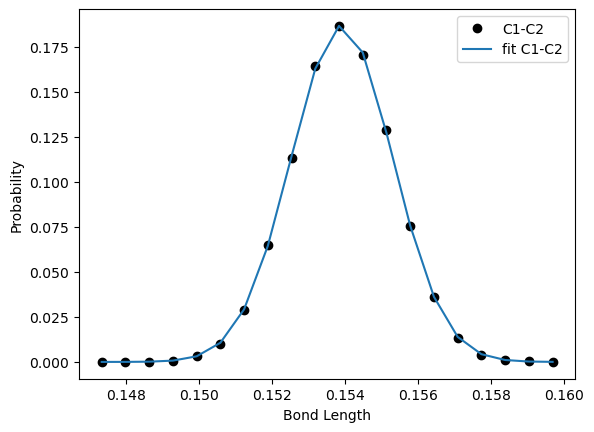

a: 0.18707059074852725, x0: 0.15394894457432765, sigma: -0.001386993346761586


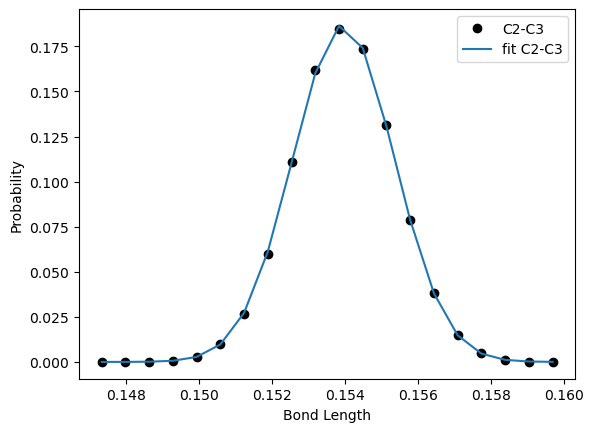

a: 0.1878672330788576, x0: 0.1539006423677305, sigma: -0.0013792226559473742


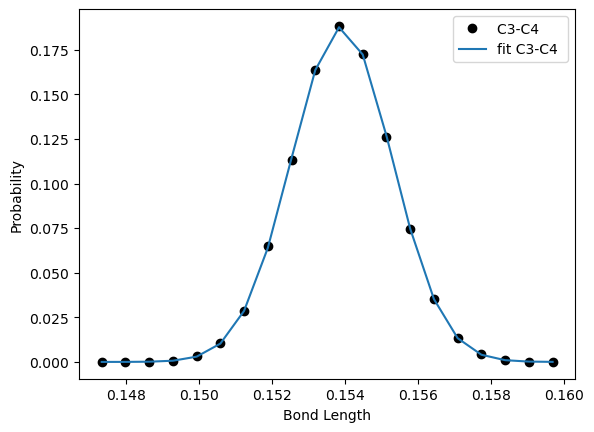

In [22]:
# Now, using my cute plotting function to iterate over all C-C bonds in my trajectory :) 
bonds = [C1C2bondlength, C2C3bondlength, C3C4bondlength]
labels = ['C1-C2', 'C2-C3', 'C3-C4 ']
for label, bond in zip(labels,bonds): 
    plot_densities_and_fits(bond, str_label = label)

**Week 1 Homework Problem #2: convert these probability distributions to culmulative distribution functions**

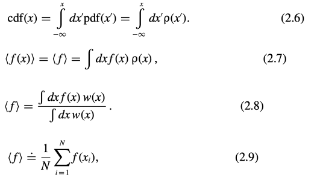

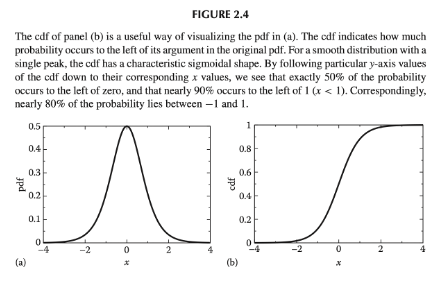

### cdfs for each of the C-C bond lengths ###

In [ ]:
# try this function here! 
np.cumsum()

In [48]:
###WEEK 1 HOMEWORK#### 

####HOMEWORK SOLUTION####
#ADD CODE FOR CDFs HERE#

# Let's modify my earlier code to make cdfs instead! 
def plot_dens_fits_cdf(arr, str_label, bins=20, range=[0.147, 0.160]): 
    '''Given an array of data, a label, a specified number of bins and data value range, 
    will plot the probability density and fitted gaussian! '''
    centers, density = hist_bin_centers(arr, bins=bins, range=range)
    arr_fit,arr_fit_params=fit_gaussian(centers,density)

    # Let's print out the bond length when we have half the frames in our simulation 
    # using np.interp (an interpolation of the bond length value :)
    # Let's use the actual densities and not the fit created tho :) 
    print(f'Bond length @ half the frames in the simulation: {np.interp(0.5, np.cumsum(density), centers):.3f}A') 

    # Now, instead of just plotting what we have, we'll use np.cumsum()
    # to return the cumulative sum of our data (wow, that's great)
    plt.plot(centers,np.cumsum(density),'o',label=str_label, color='black')
    plt.plot(centers,np.cumsum(arr_fit),'-',label=f'fit {str_label}')
    plt.legend()
    plt.xlabel('Bond Length')
    plt.ylabel('cdf')
    plt.show()

a: 0.18674549223335146, x0: 0.1539045505145995, sigma: -0.0013904725219957659
Bond length @ half the frames in the simulation: 0.154A


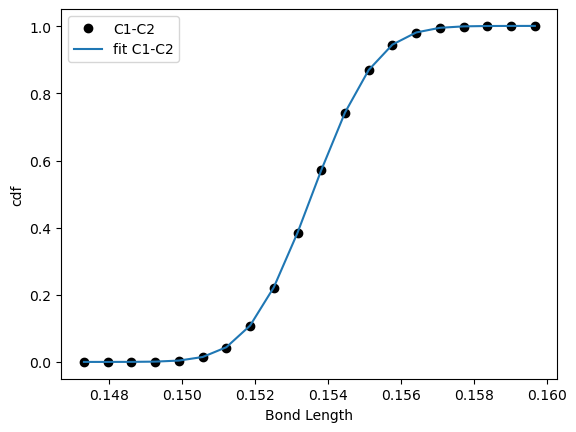

a: 0.18707059074852725, x0: 0.15394894457432765, sigma: -0.001386993346761586
Bond length @ half the frames in the simulation: 0.154A


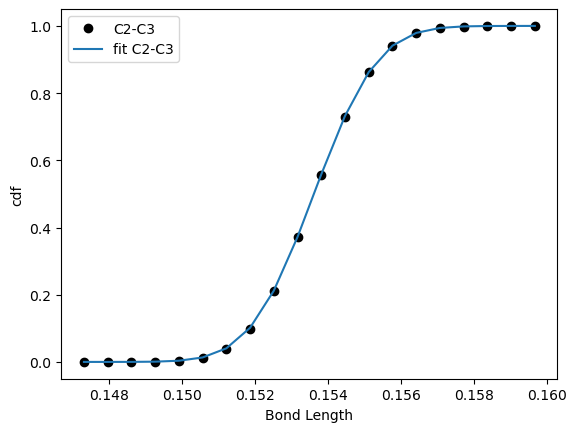

a: 0.1878672330788576, x0: 0.1539006423677305, sigma: -0.0013792226559473742
Bond length @ half the frames in the simulation: 0.154A


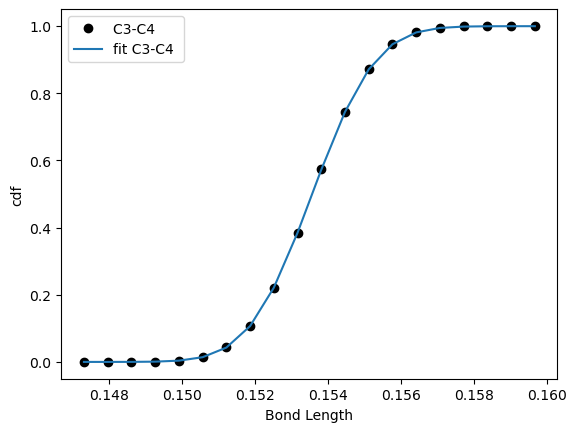

In [49]:
# Now, using my cute cdf plotting function to iterate over all C-C bonds in my trajectory :) 
bonds = [C1C2bondlength, C2C3bondlength, C3C4bondlength]
labels = ['C1-C2', 'C2-C3', 'C3-C4 ']
for label, bond in zip(labels,bonds): 
    plot_dens_fits_cdf(bond, str_label = label)

### **how many frames of my trajectory do i need to save to get a good ditribution of value?** ###


**WEEK 1 Homework Problem #3: Lets draw some random frames from our trajectory (for example 10,100,1000,10000),  calculate the probability distribution functions for 4 of these random samples, and fit  gaussians to these probability distirbution functions for 1) A Bond Angle 3) A Dihedral Angle ***
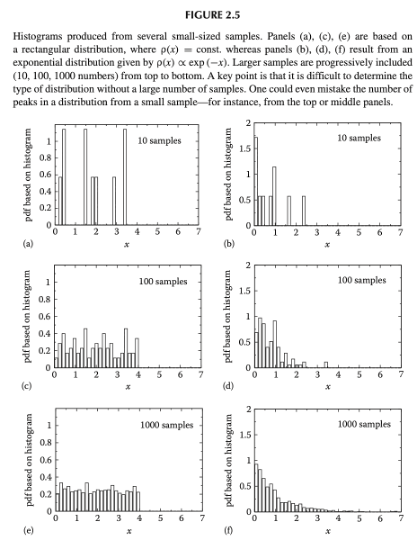

In [5]:
# the bond angle between C1C2C3
Angle1=[0,4,7] 
ang = md.compute_angles(traj,[Angle1]).squeeze()

# the dihedral angle between C1C2C3C4
CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index]).squeeze()


Looking first at the C1C2C3 bond angle: 

initial guesses: [2.113148, 1.9719421, 0.060128167]
a: 0.08018148787604268, x0: 1.9584122987217136, sigma: 0.06673293555790731


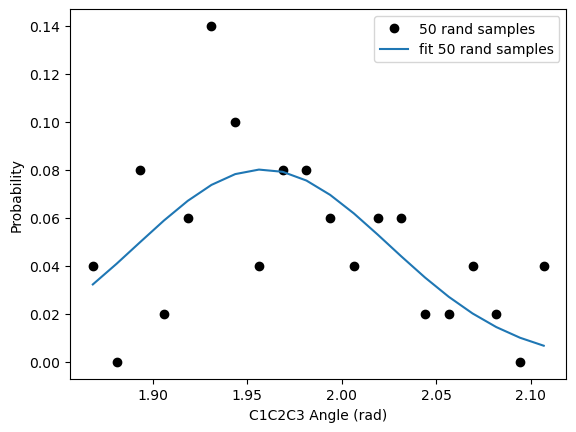

initial guesses: [2.1566079, 1.9664892, 0.062034514]
a: 0.1052205933734073, x0: 1.9748427964925144, sigma: 0.06631500466049739


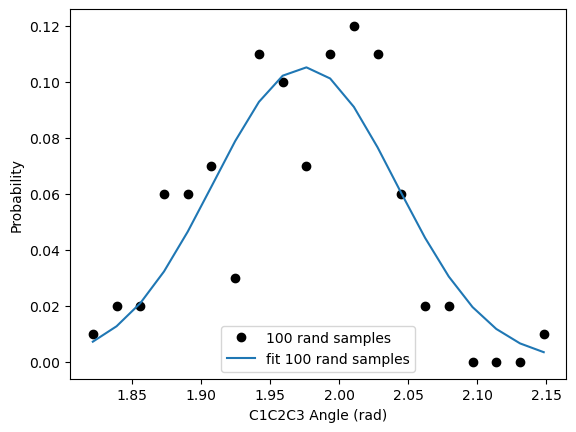

initial guesses: [2.1496065, 1.9663959, 0.05672171]
a: 0.1369471382276667, x0: 1.9666234639744218, sigma: 0.056009966862020165


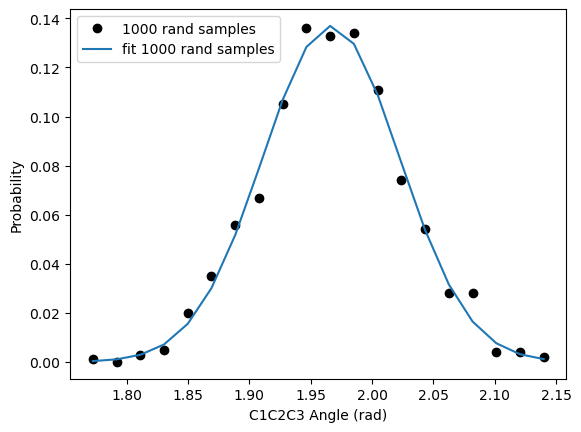

initial guesses: [2.1699214, 1.9680778, 0.05833177]
a: 0.13791740347625214, x0: 1.9676217105678018, sigma: 0.05828426640134024


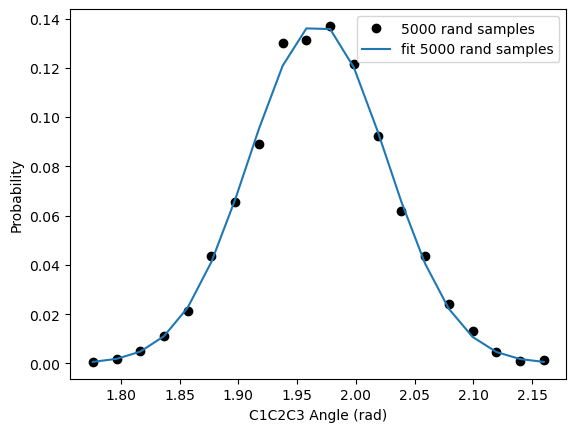

initial guesses: [2.1837745, 1.9676341, 0.05768103]
a: 0.1544008908782852, x0: 1.9669490455861802, sigma: 0.057661440246923316


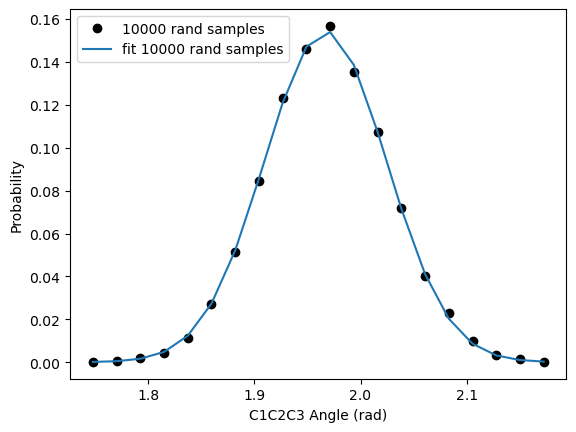

initial guesses: [2.218668, 1.9680272, 0.057909966]
a: 0.16507701236038144, x0: 1.967624561338155, sigma: 0.05819087793876955


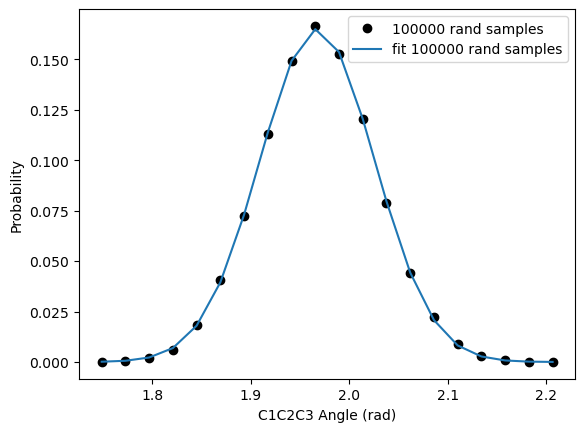

In [17]:
#ADD CODE FOR FITTING GUASSIAN FUNCTIONS TO RANDOM SAMPLES  HERE#

# First, considering the C1C2C3 bond angle  
data_sizes = [50, 100, 1000, 5000, 10000, 100000]
for size in data_sizes: 
    # grabbing n frames out of the 100,000 we have: 
    rands=np.random.randint(100000, size=(size))
    plot_densities_and_fits(ang[rands], str_label=f'{size} rand samples', range=(min(ang[rands]), max(ang[rands])), 
                            str2='C1C2C3 Angle (rad)' )

Looks like we start to see decent distributions around 5,000 random frames!

Now, for the torsion angle: 

initial guesses: [3.0355322, 2.7382455, 0.4672794]
a: 0.6339877801448773, x0: 3.362849420965545, sigma: 0.3156984521910726


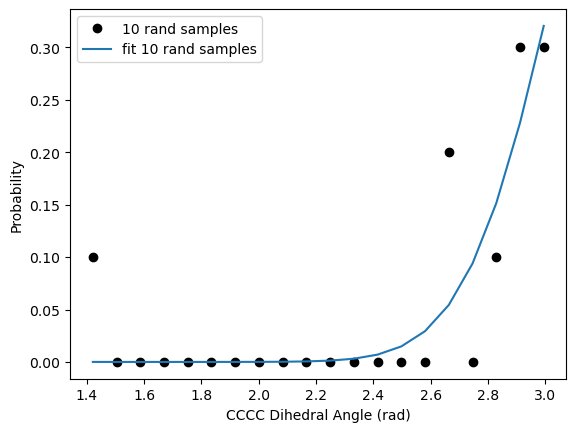

initial guesses: [3.1393645, 2.6485753, 0.67355126]
a: 0.3397321239597015, x0: 3.028338906971653, sigma: 0.18743696135620314


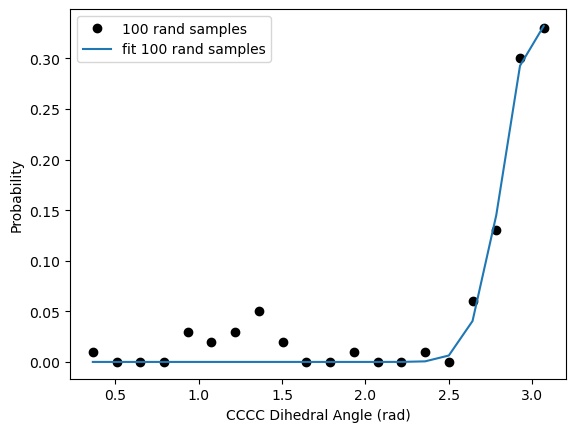

initial guesses: [3.1414678, 2.5709262, 0.73759675]
a: 0.4163827998120656, x0: 3.2642853519640767, sigma: 0.29287264475945757


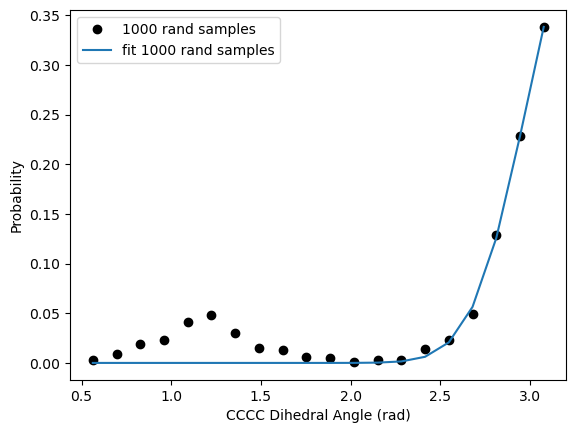

initial guesses: [3.1412923, 2.591976, 0.7220003]
a: 0.36297230969657285, x0: 3.127067623942702, sigma: 0.2225371410848899


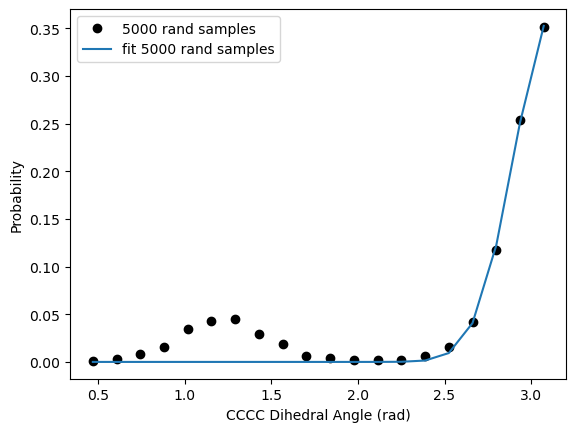

initial guesses: [3.1414585, 2.6029987, 0.7174955]
a: 0.45466585462267944, x0: 3.2074803822841975, sigma: 0.2609977803330121


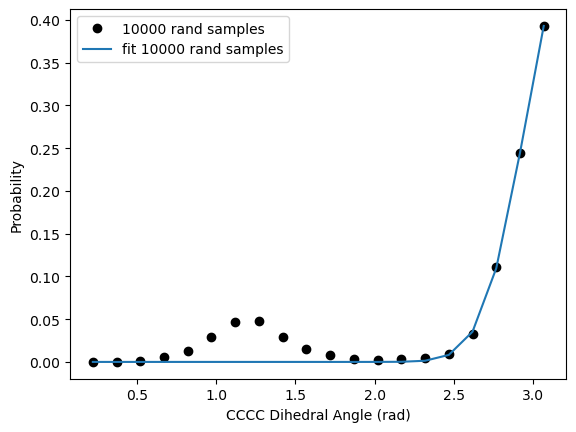

initial guesses: [3.1415894, 2.6003966, 0.7190255]
a: 0.4525593056586939, x0: 3.190816439789176, sigma: 0.2542124603169487


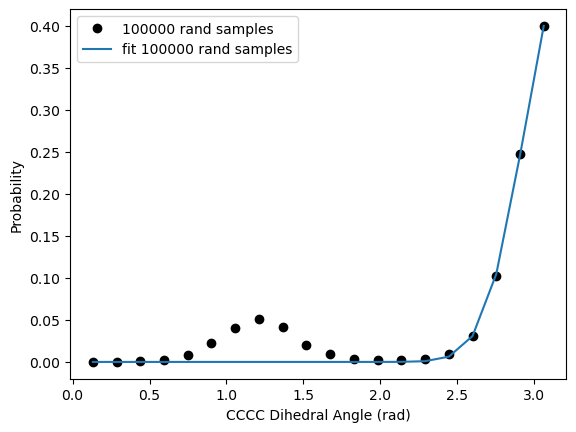

In [25]:
#Draw 10,100,1000,10000 random samples of a dihedral angle - FIT THEM TO A GAUSSIAN - WHY IS THIS FIT SO POOR?

# We're going to take the absolute value of this dihedral angle so it isn't so crazy: 
arr = np.abs(CCCC_torsion)

data_sizes = [10, 100, 1000, 5000, 10000, 100000]
for size in data_sizes: 
    rands=np.random.randint(100000, size=(size))
    plot_densities_and_fits(arr[rands], str_label=f'{size} rand samples', range=(min(arr[rands]), max(arr[rands])), 
                            str2='CCCC Dihedral Angle (rad)')

A Gaussian isn't really suited for the dihedral angle, because the dihedral angle does not have a Gaussian distribution! It looks more like a skewed bimodal distribution, where we have a small population ~ 1.25 radians (gauche +/- conformations) and a large population at ~ 3 radians (the trans conformation, which is the most energetically stable)

### Friday ###

**Class Activity: Lets Compute the 2 C-C-C Bond Anlges and C-C-C-C Dihedral Angle ***

Plot their time course and their histograms.  Find a nice way to visualize the C-C-C-C dihedral angle 

In [20]:
###Class Room Solution###
##Lets Compute Some Bond Angles & Torsions##
Angle1=[0,4,7] # between C1-C2-C3
Angle2=[4,7,10] # between C2-C3-C4

# can do it in batches! give it arr of idx
ang = md.compute_angles(traj,[Angle1,Angle2])
ang1=ang[:,0] # taking just the first angle we're interested in 
ang2= ang[:, 1]
ang1.shape

(100000,)

In [30]:
# nice little scatter dot plot thing 
# plt.plot(ang1, lw=0, marker='o', markersize=0.1)
# plt.plot(ang2, lw=0, marker='o', markersize=0.1)

In [31]:
# # Now, a histogram: 
# plt.hist(ang, bins=100, histtype='step', label=['0-4-7', '4-7-10'])
# plt.legend()
# plt.xlabel('C-C-C bond angle')
# plt.ylabel('counts')

In [32]:
# calculating the torsion angle :) in RADIANS
CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index]).squeeze()
CCCC_torsion.shape

# if you want degrees: 
#CCCC_torsion_deg = np.rad2deg(CCCC_torsion)

(100000,)

(0.0, 1000.0)

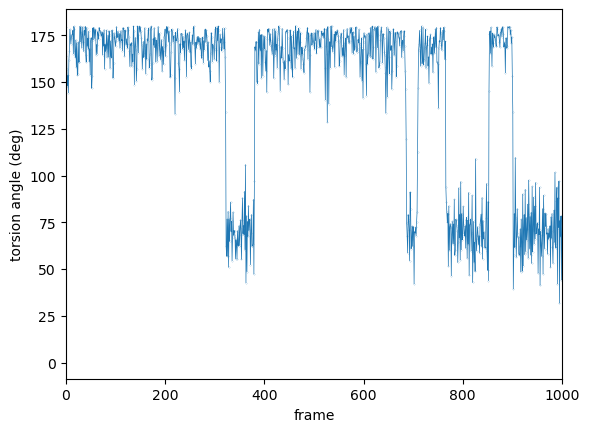

In [48]:
# looking at a time series to see the jump from the ground state to the gauche :) 

CCCC_torsion_offset = np.rad2deg(np.absolute(CCCC_torsion))

plt.plot(CCCC_torsion_offset, lw=0.5, marker='o', markersize=0.1)
plt.xlabel('frame')
plt.ylabel('torsion angle (deg)')
plt.xlim([0,1000])

In [49]:
# # ground state torsion at 180 degrees (pi rad)
# # excursions to the gauche conformations +- 60 degrees

# plt.plot(CCCC_torsion, lw=0, marker='o', markersize=0.1)
# plt.xlabel('frame')
# plt.ylabel('torsion angle (rad)')

### ***Week 1 Homework Question:  What is the probability of being found in the higher free energy C-C-C-C dihedral state?***** ###

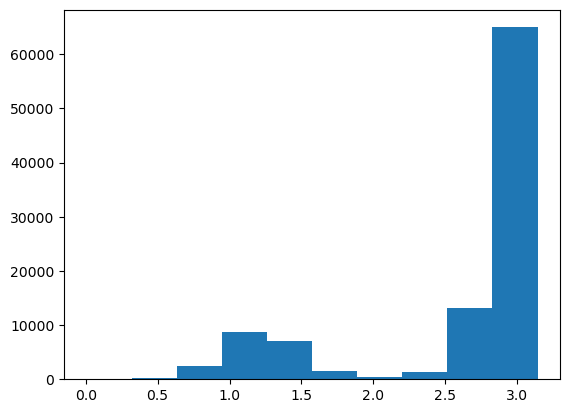

In [31]:
####Week 1 Homework Question: What is the probability of being found in the higher free energy C-C-C-C dihedral state? ####
#### Calculate Here #####

# first, plotting our torsion angle to see where we should make our cutoff: 
dihed = np.abs(CCCC_torsion)
a = plt.hist(dihed)

In [43]:
# Looks like the higher energy state is when the dihedral angle is between 0 and ~2 radians. 
# Using those cutoffs to find the # of states with those specifications: 

a = np.where((dihed > 0) & (dihed < 2))[0]
print(f'Probability of being in higher free energy dihedral state: {len(a)/len(dihed)}')

Probability of being in higher free energy dihedral state: 0.2033


### **Class Activity: Are The Bond Angles and Dihedral Angle Correlated?** ###

r^2: 0.0023168397006654625


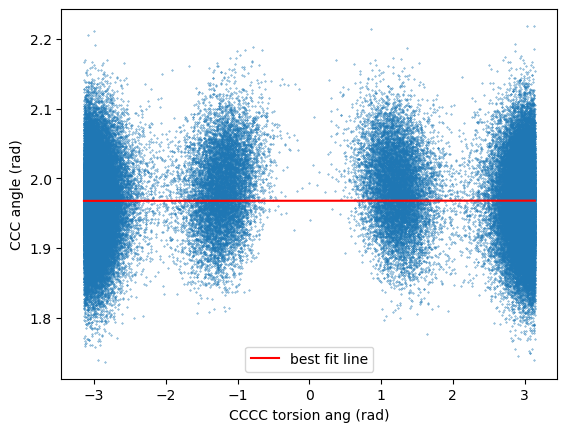

In [64]:
#### COMPLETE IN-CLASS ACTIVITY HERE #####
#Are the bond angle and dihedral correlated?
CCCC_dihe=CCCC_torsion

plt.scatter(CCCC_dihe, ang1, marker='o', s=0.1)
plt.xlabel('CCCC torsion ang (rad)')
plt.ylabel('CCC angle (rad)')
r = np.corrcoef(CCCC_dihe, ang1)
print(f'r^2: {r[0,1]}')
linefit= np.polyfit(CCCC_dihe, ang1,1)
x=np.linspace(min(CCCC_dihe), max(CCCC_dihe), 20)
y = linefit[1]+x*linefit[0]
plt.plot(x, y, c='r', label='best fit line')
plt.legend()


##### ADD FANCY SEABORN PLOT HERE ######

### **Homework Problem 3: Can you express the relationsip between these two quantites using histograms and conditional probabilities ?** ###

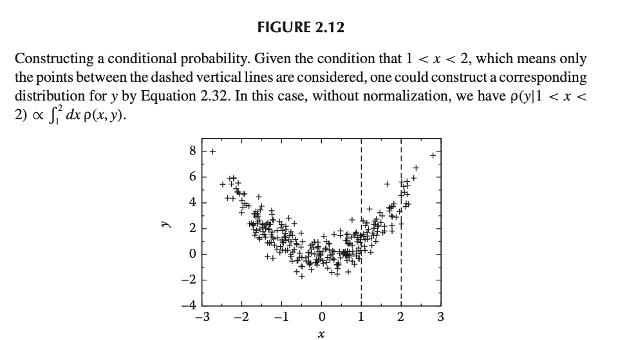

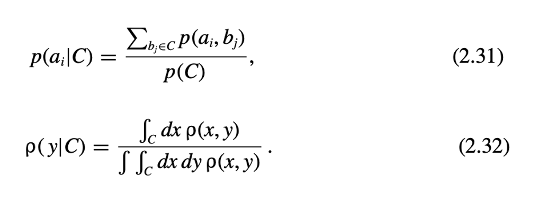

In [ ]:
#Homework problem 3 Solution ##

# When the dihedral is this, this is the distribution of the bond angle (in a histogram)

#### This will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [6]:
# getting the full distribution again (so it has four peaks from -3 rad to +3 rad)
# I just hate that variable name
all_dihed = CCCC_torsion

Text(0.5, 0, 'Bond angle C1C2C3 (rad)')

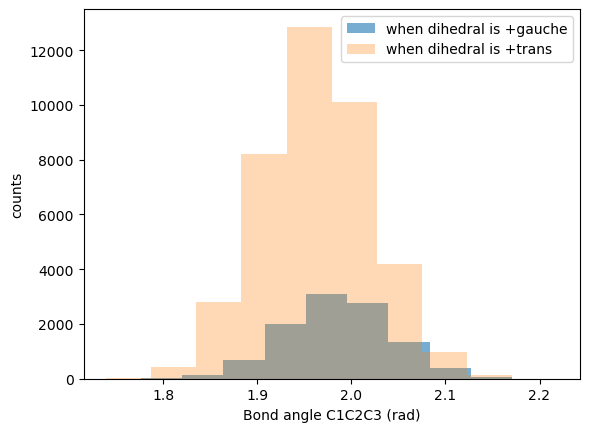

In [20]:
# Observing the C1C2C3 bond angle when the dihedral angle is in the higher energy, +gauche state: 
idx = np.where((all_dihed>0)&(all_dihed<2))
dihed_sele = all_dihed[idx]
ang_sele = ang[idx]
a = plt.hist(ang_sele, alpha=0.6, label='when dihedral is +gauche')

# Now, looking at C1C2C3 bond angle when the dihedral angle is trans 
# Looking at the approach to the trans conformation from the positive side: 
idx2 = np.where((all_dihed>2))
dihed_sele = all_dihed[idx2]
ang_sele2 = ang[idx2]
a = plt.hist(ang_sele2, alpha=0.3, label='when dihedral is +trans')

plt.legend()
plt.ylabel('counts')
plt.xlabel('Bond angle C1C2C3 (rad)')


### Autocorrelation ###
should decrease as the shift becomes greater (when the y hits 0.333) --> to forget about its previous value 

see where this ends up on the timescale of the whole simulation 


if you want 200 independent samples, we want to run the simulation for 200*decorrleation_time 

makes sense!! :) 

In [70]:
#Will Walk through example of Autocorrelation Function (ACF) calculation here#
def autocorr1(x,lags):
    '''np.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)
    
# how this is working
print(ang1.shape)
print(ang1[1:].shape) # truncate the first frame
print(ang1[:-1].shape) # truncate the last frame
np.corrcoef(ang1[1:], ang1[:-1])[0,1]

(100000,)
(99999,)
(99999,)


0.317113052715923

**Class Activity: Lets Calculate the Autocorrelation Times of C-C Bonds, C-C-C Angles, and C-C-C-C Dihedrals**

https://ipython-books.github.io/103-computing-the-autocorrelation-of-a-time-series/

In [71]:
C1C2bondlength.shape

(100000, 1)

[0.00000e+00 2.00002e-01 4.00004e-01 ... 1.99996e+04 1.99998e+04
 2.00000e+04]


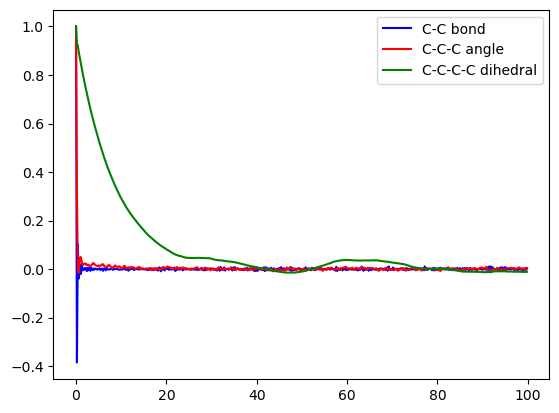

In [73]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
# need to do the cosine to get something much smoother (so we can actually see when its decorrelated)
dihe_autocor=autocorr1(np.cos(CCCC_torsion),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

# we see that bond angle and bond length decorrelate almost instantaneously 
# the torsions are different! looks like we need ~10ps to decorrlate (to ~.33)

### **Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms** ###

Documentation of Torsion Term Conventions:

https://ambermd.org/doc12/Amber21.pdf#page=264

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts

From Butane.gaff2.xml

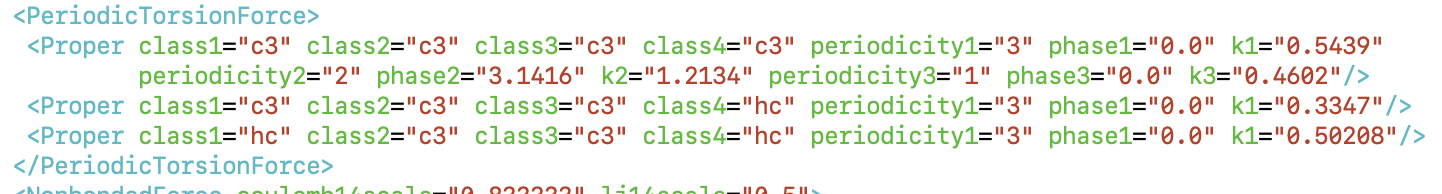

In [21]:
with open(forcefield_file_name, 'r') as open_file: 
    lines = open_file.readlines()
    for line in lines: 
        print(line)

<ForceField>

 <AtomTypes>

  <Type name="0" class="c3" element="C" mass="12.01078"/>

  <Type name="1" class="c3" element="C" mass="12.01078"/>

  <Type name="2" class="hc" element="H" mass="1.007947"/>

  <Type name="3" class="hc" element="H" mass="1.007947"/>

 </AtomTypes>

 <Residues>

  <Residue name="NBU">

   <Atom name="C1" type="0"/>

   <Atom name="H11" type="2"/>

   <Atom name="H12" type="2"/>

   <Atom name="H13" type="2"/>

   <Atom name="C2" type="1"/>

   <Atom name="H21" type="3"/>

   <Atom name="H22" type="3"/>

   <Atom name="C3" type="1"/>

   <Atom name="H31" type="3"/>

   <Atom name="H32" type="3"/>

   <Atom name="C4" type="0"/>

   <Atom name="H41" type="2"/>

   <Atom name="H42" type="2"/>

   <Atom name="H43" type="2"/>

   <Bond atomName1="C1" atomName2="H11"/>

   <Bond atomName1="C1" atomName2="H12"/>

   <Bond atomName1="C1" atomName2="H13"/>

   <Bond atomName1="C1" atomName2="C2"/>

   <Bond atomName1="C2" atomName2="H21"/>

   <Bond atomName1="C2" at

In [28]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms
# okay paul already has these written fucking rip 

def calc_torsion_energy(angle, k1, period, phase):
    """ where U(theta) = k1 * cos (ntheta-thetaeq)"""
    return k1*(1+np.cos(period*angle-phase))

def cccc_torsion_e(angle):
    # from the forcefield gaff file, has three different ones for the cccc torsion term: 
    e1 = calc_torsion_energy(angle, 0.462, 1, 0) 
    e2 = calc_torsion_energy(angle, 1.2134, 2, 3.1416)
    e3 = calc_torsion_energy(angle, 0.5439, 3, 0)
    return e1+e2+e3

# for the other two torsion types: 
def ccch_torsion_e(angle): 
    return calc_torsion_energy(angle, 0.3347, 3, 0)

def hcch_torsion_e(angle):
    return calc_torsion_energy(angle, 0.50208, 3, 0)

In [29]:
# Now, finding the energies that will be given by our force field for a range of pi values: 
cccc_e = cccc_torsion_e(rad_ang)
ccch_e = ccch_torsion_e(rad_ang)
hcch_e = hcch_torsion_e(rad_ang)

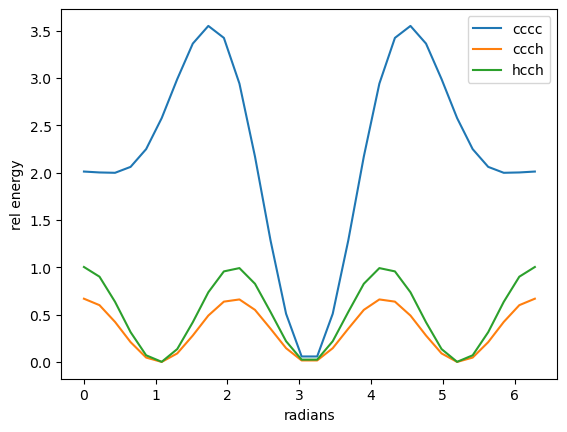

In [32]:
# Plotting them to see what they look like: 
plt.plot(rad_ang, cccc_e, label='cccc')
plt.plot(rad_ang, ccch_e, label='ccch')
plt.plot(rad_ang, hcch_e, label='hcch')
plt.xlabel('radians')
plt.ylabel('rel energy')
plt.legend()

In [46]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5439" 
          periodicity2="2" phase2="3.1416" k2="1.2134" periodicity3="1" phase3="0.0" k3="0.4602"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5439" 
          periodicity2="2" phase2="3.1416" k2="1.2134" periodicity3="1" phase3="0.0" k3="0.4602"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

In [4]:
#Lets Consider Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Central Torsion: 
#C-C-C-C -[10,7,4,0]
#H-C-C-H; [8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6]  
#H-C-C-H; [6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3]
#H-C-C-H; [13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]
#C-C-C-H -[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

CCCC_index=[10,7,4,0]
HCCH_indices=[[8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6],[6,4,0,1],[6,4,0,2],
              [6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3],[13,10,7,8],[12,10,7,8],[11,10,7,8],
              [13,10,7,9],[12,10,7,9],[11,10,7,9]]
CCCH_indices=[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

HCCH_torsions=md.compute_dihedrals(traj, HCCH_indices)
CCCH_torsions=md.compute_dihedrals(traj, CCCH_indices)
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])


### **Homework Problem #5: Many of These Correlations will be highly Correlated. Select Some Torsions that are Correlated, and some that are not, and make scatter plots of their relationships** ###

For a Torsion Angle Pair that is highly correlated, can you find a relatively constant offset?  

For a Torsion Angle Pair that are less correlated, how can you interpret their scatter plots?

In [34]:
HCCH_torsions.shape

(100000, 16)

r^2: 0.6274710625522161


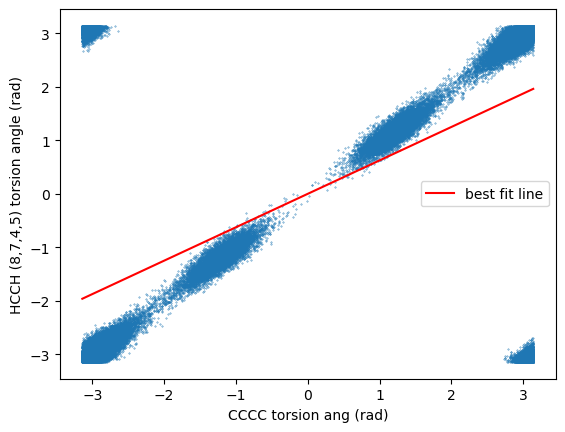

In [35]:
####WEEK 1 Homework Problem 5 - Correlations in torsion paramters###
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE HIGHLY CORRELATED - EXPLAIN WHY - EXPLAIN WHAT YOU SEE
#Consider CCCC vs. [8,7,4,5]

plt.scatter(CCCC_torsion.squeeze(), HCCH_torsions[:,0], marker='o', s=0.1)
plt.xlabel('CCCC torsion ang (rad)')
plt.ylabel('HCCH (8,7,4,5) torsion angle (rad)')
r = np.corrcoef(CCCC_torsion.squeeze(), HCCH_torsions[:,0])
print(f'r^2: {r[0,1]}')
linefit= np.polyfit(CCCC_torsion.squeeze(), HCCH_torsions[:,0],1)
x=np.linspace(min(CCCC_torsion.squeeze()), max(CCCC_torsion.squeeze()), 20)
y = linefit[1]+x*linefit[0]
plt.plot(x, y, c='r', label='best fit line')
plt.legend()


These torsions are highly correlated! We're considering CCCC and H2C2C3H3 (where H2 is on C2 and H3 is on C3). One relationship I see is that the torsion angles are often equal. This makes sense because the two terminal Cs are bond to C2 and C3, as are these two terminal Hs. When they rotate and change the angle, bond geometry requires that the other pair move, thus resulting in the same dihedral angle. 

We see the (3, -3) and (-3, 3) hotspots because these describe the 180 positions. at 180, the sign can switch between 3 and -3 by convention, allowing for the match up of -3 and 3 I believe. 

r^2: 0.019472698308054082


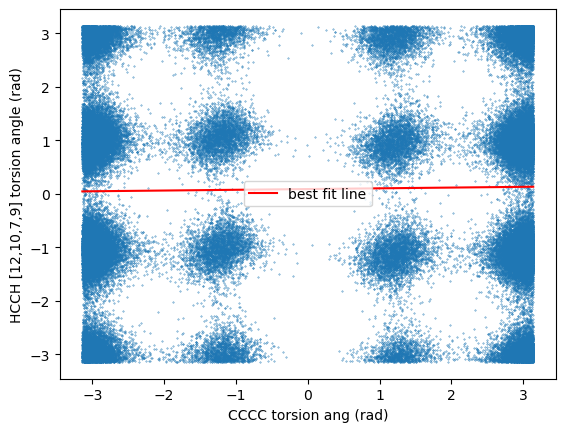

In [41]:
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED - Explain what you see
#Consider CCCC vs. [12,10,7,9]

plt.scatter(CCCC_torsion.squeeze(), HCCH_torsions[:,-2], marker='o', s=0.1)
plt.xlabel('CCCC torsion ang (rad)')
plt.ylabel('HCCH [12,10,7,9] torsion angle (rad)')
r = np.corrcoef(CCCC_torsion.squeeze(), HCCH_torsions[:,-2])
print(f'r^2: {r[0,1]}')
linefit= np.polyfit(CCCC_torsion.squeeze(), HCCH_torsions[:,-2],1)
x=np.linspace(min(CCCC_torsion.squeeze()), max(CCCC_torsion.squeeze()), 20)
y = linefit[1]+x*linefit[0]
plt.plot(x, y, c='r', label='best fit line')
plt.legend()


Whoa check it out! No nice correlation like we saw in the last one. Here we get localized spots, which correspond with each staggered conformation that exists. So, essentially, either dihedral is existing in the the +/- gauche and trans conformations, which no preference for the other. Therefore, we see relatively equally populated clusters, but with a preference for the CCCC trans conformation (more bulky group wins out over the HCCH dihedral angle)

### **Homework Problem #6: SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT** ###

Text(0, 0.5, 'HCCH (8,7,4,6) torsion angle (rad)')

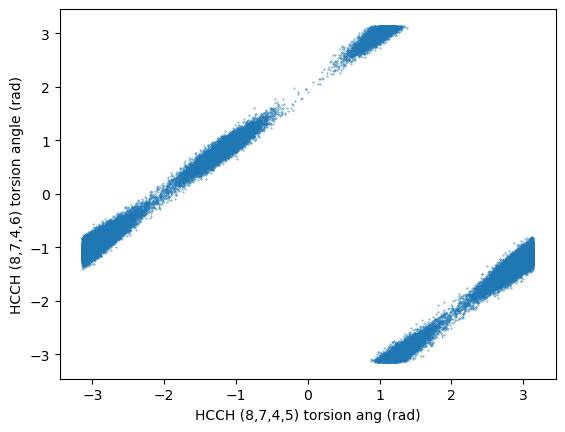

In [5]:
#SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
#CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT

#Consider H2-C2-C3-H3 vs. H2'-C2-C3-H3 (two different hydrogens on C2)

plt.scatter(HCCH_torsions[:,0], HCCH_torsions[:,1], marker='o', s=0.1)
plt.xlabel('HCCH (8,7,4,5) torsion ang (rad)')
plt.ylabel('HCCH (8,7,4,6) torsion angle (rad)')

Here, we're looking at H2-C2-C3-H3 vs. H2'-C2-C3-H3, where H2 and H2' are two different hydrogens on C2 and H3 is a hydrogen on C3. As both of these hyrodgens are attached to the same C2 atom, I would expect an offset of +/-60 degrees due to bond geometry . Let's calculate it though to see: 

Text(0, 0.5, 'density')

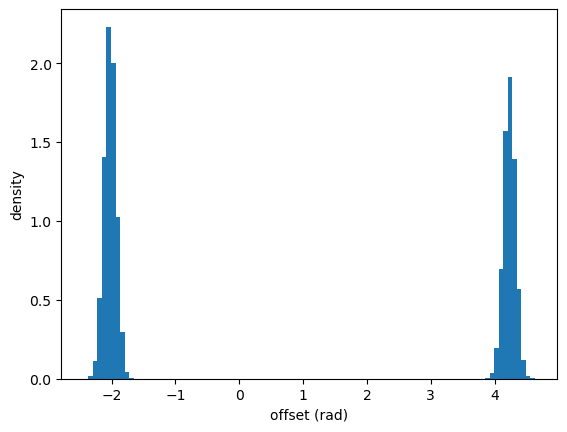

In [54]:
# Subtracting one from the other to get the difference: 
diff = HCCH_torsions[:,0] - HCCH_torsions[:,1]
bins = plt.hist(diff, bins=100, density=True)
plt.xlabel('offset (rad)')
plt.ylabel('density')

Alright! I sort of understand this one. We have an offset by -120 degrees (-2 rad) and then by +240 degrees (~4 radians). These are just different numbers that describe 60 degrees I'm assuming (180-60=120, 360-120=240). Essentially, the two torsions are directly correlated, but offset because when C2 spins around, both H2 and H2' will spin to the same degree, and will always have that offset of 60 degrees (wish I understood this better and could explain it better but this is the gist)

### ***WEEK 2 Homework Problem #1: Lets modify the C-C-C-C Torsion Potential to change the dihedral distribution*** ###


Lets try to lower the dihedral barriers for torsion angles of 1 radian (~60 degrees)
This means we need to to come up with a torsion potential, potentially by using multiple terms with different phases, to equalize the free energy of each C-C-C-C torsion basin (increasing the free energy at $\pi$ and lowering 
free energy at $\pi$/3

Once you've come up with torsion terms you're happy with, you'll need to make a copy of the butane.gaff2.xml, add in the additional torsion terms you have come up with, and run a new simulation.  Then plot the C-C-C-C dihedral histogram or PMF, and compare it to the simulation with original force field.

It would be great if you came up with some kind of fitting routine to determine the coefficients of torsions, perhaps by targeting a gaussian, or you can try to arrive at by hand using something like this:

https://www.desmos.com/calculator/ea1qhzjnuf

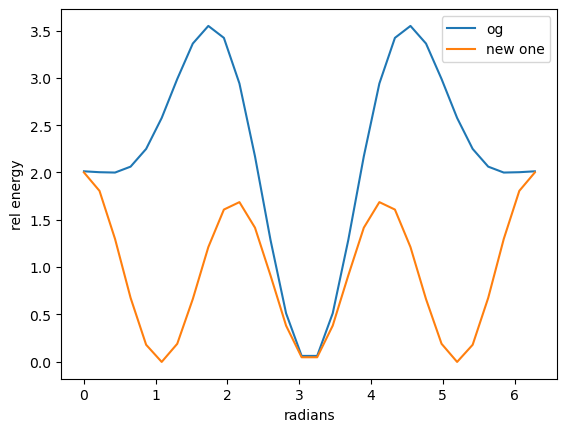

In [66]:
# From before: 
def calc_torsion_energy(angle, k1, period, phase):
    """ where U(theta) = k1 * cos (ntheta-thetaeq)"""
    return k1*(1+np.cos(period*angle-phase))

def cccc_torsion_e(angle):
    # from the forcefield gaff file, has three different ones for the cccc torsion term: 
    e1 = calc_torsion_energy(angle, 0.462, 1, 0) 
    e2 = calc_torsion_energy(angle, 1.2134, 2, 3.1416)
    e3 = calc_torsion_energy(angle, 0.5439, 3, 0)
    return e1+e2+e3

def new_cccc_torsion(angle):
    # trying to make my new one by hand? 
    e1 = calc_torsion_energy(angle, 0.1, 1, 0) 
    e2 = calc_torsion_energy(angle, -0.1, 2, 3.1416)
    e3 = calc_torsion_energy(angle, 0.9, 3, 0)
    return e1+e2+e3

rad_ang=np.linspace(0,2*math.pi,30)
new_cccc_e = new_cccc_torsion(rad_ang)
cccc_e = cccc_torsion_e(rad_ang)
plt.plot(rad_ang, cccc_e, label='og')
plt.plot(rad_ang, new_cccc_e, label='new one')
plt.xlabel('radians')
plt.ylabel('rel energy')
plt.legend()

### ***WEEK 2 Homework Problem #2 Attempt to run a new MD Simulation with your modified torsion potential*** ###

Once you have made a torsion correction you like make a new force field file 'butane.gaff2.cor1.xml'.

Run a new simulation with this force field and compare the dihedral distributions 

In [68]:
#RUN NEW MD SIMULATION HERE#
workdir = '/Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise0'
datadir = '/Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise0/data'
outdir = '/Users/anjalidhar/Desktop/chem101.6/CHEM101.6/Exercise0/outdir'
pdb_file = f'{datadir}/butane.pdb'
fffile = f'{datadir}/butane_edited.gaff2.xml'

In [69]:
pdb = mm.app.PDBFile(pdb_file)
forcefield = mm.app.ForceField(fffile)

In [70]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = mm.app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)
print('Minimizing...')
st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")
simulation.minimizeEnergy(maxIterations=100)
st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.797528692148689 kJ/mol
Potential energy after minimization is 5.295271827667386 kJ/mol


In [71]:
from sys import stdout
print('Equilibrating...')

simulation.reporters.append(mm.app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,49.287763485111924,224.77003175065977
2000,45.5684757131593,358.2303376456095


In [73]:
import time as time

print('Running Production...')

tinit=time.time()
simulation.reporters.clear() # clear the previous equilibration
simulation.reporters.append(mm.app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

simulation.reporters.append(mm.app.DCDReporter(outdir+'/butane_tor_edits.dcd', 100))

# run the simulation for 1.0x10^7 steps (20ns)
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...


#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
1250000,2499.9999999547067,41.78641157058371,281.3852942538972,0
1500000,2999.9999999428833,34.8388700656151,237.0051972723902,1.18e+04
1750000,3499.99999993106,28.90821737598317,213.893871736985,1.1e+04
2000000,3999.9999999192364,78.42103672984557,477.5129677305658,1.11e+04
2250000,4499.9999999992715,51.09077512397684,212.052629754128,1.13e+04
2500000,5000.000000101135,46.54840095578184,265.5274688498205,1.14e+04
2750000,5500.000000202998,21.47381251045502,274.77864917581115,1.15e+04
3000000,6000.000000304862,39.81241429134336,192.15700586745493,1.13e+04
3250000,6500.000000406725,47.2445504245782,273.2541340708503,1.12e+04
3500000,7000.0000005085885,49.547817232686995,278.5186800079385,1.12e+04
3750000,7500.000000610452,23.26037747943832,319.3048667444757,1.13e+04
4000000,8000.000000712315,44.79541725019432,312.87270156503155,1.13e+04
4250000,8500.000000814178,50.738161733056835,250.15061801450332,1.14

In [74]:
new_traj = md.load(f'{outdir}/butane_tor_edits.dcd', top=pdb_file)

In [76]:
CCCC_index=[10,7,4,0]
new_cccc_torangles = md.compute_dihedrals(new_traj, [CCCC_index])

Text(0, 0.5, 'counts')

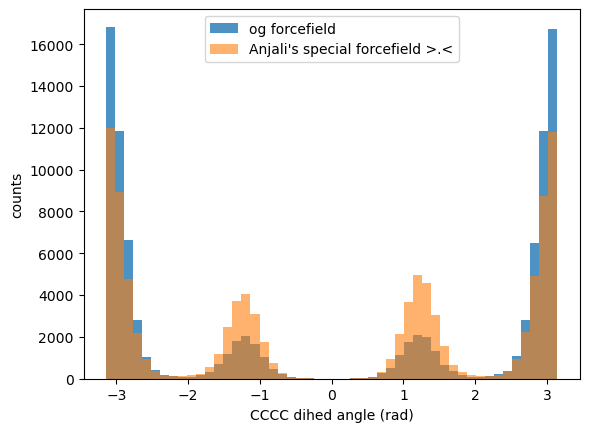

In [87]:
bins = plt.hist(CCCC_torsion.squeeze(), label='og forcefield', bins=50, alpha=0.8)
bins2 = plt.hist(new_cccc_torangles.squeeze(), label="Anjali's special forcefield >.<", alpha=0.6, bins=50)
plt.legend()
plt.xlabel('CCCC dihed angle (rad)')
plt.ylabel('counts')

Not as dramatic as I would like it to be, but still, there's a change there! Less population in the trans conformation and more population in the gauche +/- conformations :) 

### **WEEK 2 Homework Problem #3 Plot the LJ and Coulumb Forcefield Potentials for 3 types of atom pairs** ###

#CHECK THE COMBINATION RULES USED FOR OPENMM##


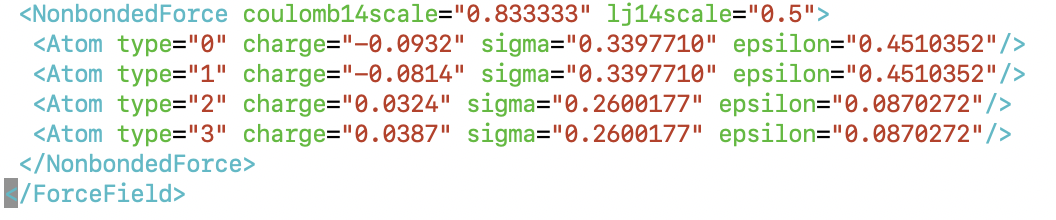




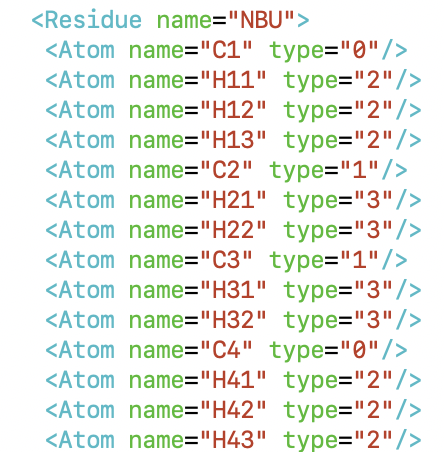

Lennard-Jones Potentials :

In [112]:
# Using the LJ eq: 
def lennardj(ep, sigma, r):
    return 4*ep*( (sigma/r)**12 - (sigma/r)**6)

# to combine sigmas, we take the arithmatic average
def comb_sig(sig1,sig2):
    return (sig1 + sig2)/2

# to combine epsilons, we take the geometric average
def comb_ep(ep1,ep2):
    return (ep1*ep2)**0.5

# generating our x (r)
r = np.linspace(0.01,1.0,100)

# grabbing values from the xml file for: 
# C - C:
cc_lj = lennardj(comb_sig(.3397710, 0.3397710), comb_ep(.4510352, .4510352),r)
# C - H
ch_lj = lennardj(comb_sig(.3397710, .2600177), comb_ep(.4510352,  0.0870272),r)
# H - H
hh_lj = lennardj(comb_sig(0.2600177, .2600177), comb_ep(0.0870272,0.0870272),r)

Text(0.5, 1.0, 'lennard jones potentials')

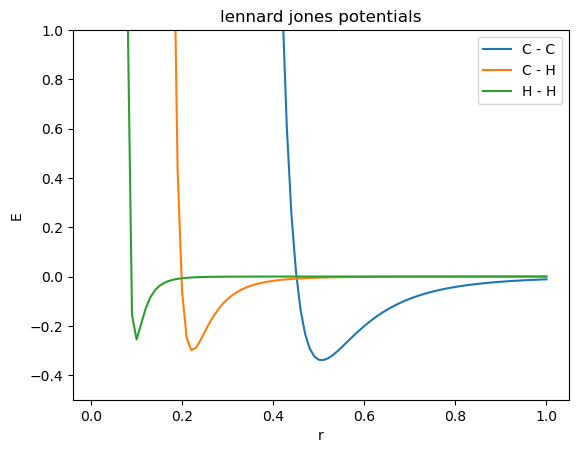

In [120]:
plt.plot(r,cc_lj, label = 'C - C')
plt.plot(r,ch_lj, label = 'C - H')
plt.plot(r,hh_lj, label = 'H - H')
plt.ylim(-.5, 1)
plt.legend()
plt.xlabel('r')
plt.ylabel('E')
plt.title('lennard jones potentials')

Now, plotting the Couloumb Potentials 

In [117]:
def coul(q1, q2, r, ep):
    return (q1*q2)/(4*np.pi*ep*r)

# Between C1 - C2:
cc_coul = coul(-0.0932, -0.0814, r, comb_ep(.4510352, .4510352))
# Between C1 - H1 (H on C1):
ch_coul = coul(-0.0932, 0.0324, r, comb_ep(.4510352, 0.0870272))
# Between H1 - H2 (H on C1 and H on C2):
hh_coul = coul(0.0324, 0.0387, r, comb_ep(0.0870272, 0.0870272))

Text(0.5, 1.0, 'Coulomb Potentials')

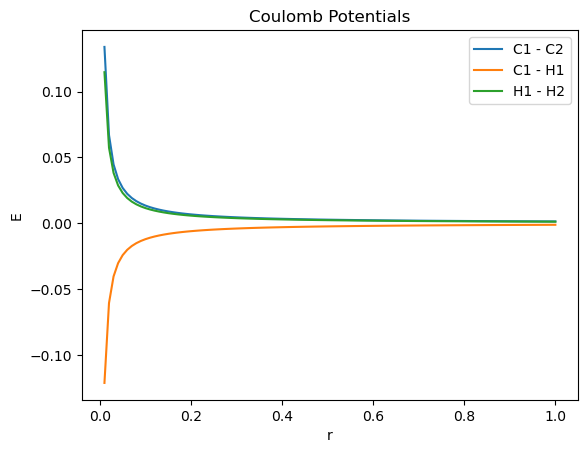

In [119]:
plt.plot(r,cc_coul, label = 'C1 - C2')
plt.plot(r,ch_coul, label = 'C1 - H1')
plt.plot(r,hh_coul, label = 'H1 - H2')
plt.legend()
plt.xlabel('r')
plt.ylabel('E')
plt.title('Coulomb Potentials')